In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os
import warnings; warnings.simplefilter('ignore')


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 



------------------------------




$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [3]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [4]:
def single_samp(lgMv, dex):

    log_e = -1.5
    a = 1.82
    lgMs = log_e + 12.5 + a*lgMv - a*12.5
    scatter = np.random.normal(loc=0, scale=dex, size=(lgMs.shape[0])) # the standard normal PDF
    return (lgMs + scatter)- (dex**2)/4.605

In [5]:
halo_masses = np.log10(np.logspace(7, 14, 100)) # just for the model

stellar_masses = galhalo.lgMs_D22_det(halo_masses) 

stellar_masses_15 = single_samp(halo_masses, 0.1) 

stellar_masses_5 = single_samp(halo_masses, 0.5) 

stellar_masses_2 = single_samp(halo_masses, 1) 

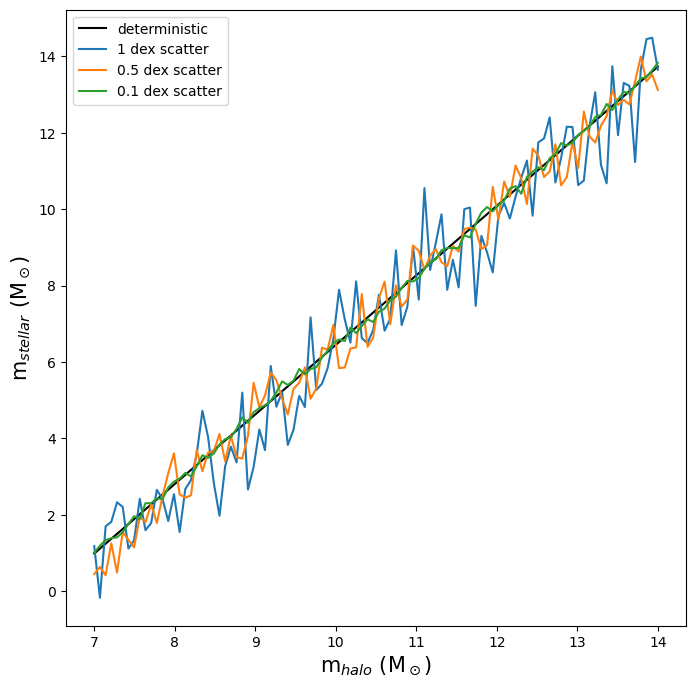

In [6]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses, color="black", label="deterministic")

plt.plot(halo_masses, stellar_masses_2, label="1 dex scatter")
plt.plot(halo_masses, stellar_masses_5, label="0.5 dex scatter")
plt.plot(halo_masses, stellar_masses_15, label="0.1 dex scatter")


plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [7]:
stellar_masses_RP = galhalo.lgMs_RP17(halo_masses, 0)
stellar_masses_B = galhalo.lgMs_B13(halo_masses,0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(halo_masses, 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(halo_masses,0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(halo_masses, 1)
stellar_masses_B_2 = galhalo.lgMs_B13(halo_masses,1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(halo_masses, 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(halo_masses,1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(halo_masses, 2)
stellar_masses_B_4 = galhalo.lgMs_B13(halo_masses,2)

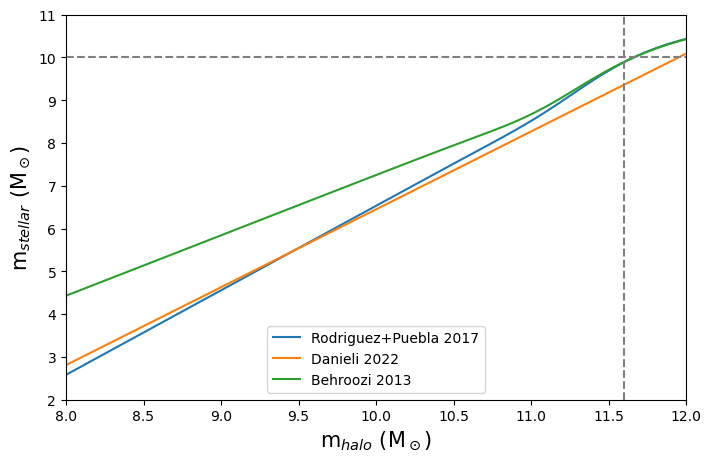

In [8]:
plt.figure(figsize=(8, 5))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017")
plt.plot(halo_masses, stellar_masses, label="Danieli 2022")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.axvline(11.6, color="grey", ls="--")
plt.axhline(10, color="grey", ls="--")
plt.ylim(2,11)
plt.xlim(8,12)

plt.show()

In [9]:
dM = 0.1

dMs_dM_B = np.gradient(galhalo.lgMs_B13(halo_masses,0), dM)
dMs_dM_RP = np.gradient(galhalo.lgMs_RP17(halo_masses,0), dM)

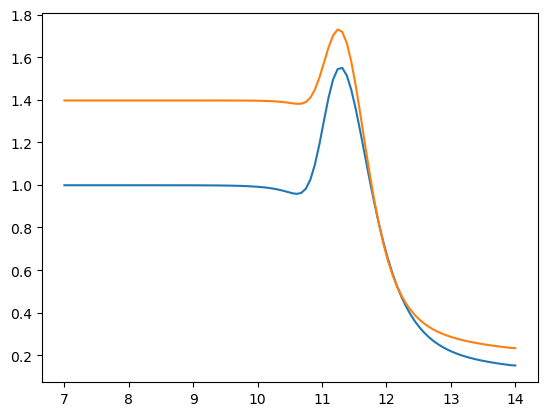

In [10]:
plt.plot(halo_masses, dMs_dM_B)
plt.plot(halo_masses, dMs_dM_RP)
plt.show()

In [11]:
# slope_diff = dMs_dM_RP - dMs_dM_B

# anchor_ind =  np.where(slope_diff == np.min(slope_diff))[0][0]

# anchor_point = (halo_masses[anchor_ind], stellar_masses_B[anchor_ind])

#79 # index where they last agree, slopes are slightly different

anchor_ind = 79 #11.6 Mv

anchor_point = (11.67, 10)

In [12]:
galhalo.lgMs_RP17(11.67)

10.014968691987482

In [13]:
stellar_masses[anchor_ind]

11.156262626262624

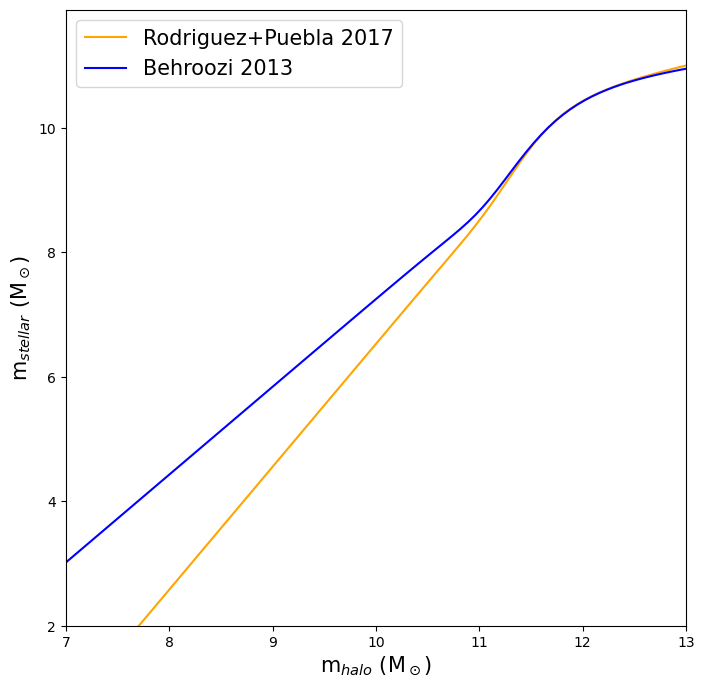

In [28]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017", color="orange")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013", color="blue")

#plt.fill_between(halo_masses, stellar_masses_RP-1, stellar_masses_RP+1, color="orange", alpha=0.2)


#plt.plot(halo_masses, stellar_masses, label="Danieli 2022", color="green")
#plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013", color="blue")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
# plt.axhline(y=6.5, ls="-.", label="SAGA limit", color="red")
# plt.axhline(y=5.5, ls="-.", label="ELVES limit", color="navy")

# # plt.axvline(9.45, ymax=0.38, color="navy", ls="--")
# # plt.axvline(10, ymax=0.5, color="red", ls="--")

# plt.axvline(8.7, ymax=0.38, color="navy", ls="--")
# plt.axvline(9.39, ymax=0.5, color="red", ls="--")

plt.ylim(2)
plt.xlim(7, 13)

#plt.plot(anchor_point[0], anchor_point[1], marker="*", color="red", markersize=20)

plt.legend(fontsize=15)
plt.show()

In [28]:
12.5-8

4.5

In [ ]:
4.5

In [24]:
plt.axhline?

Signature: plt.axhline(y=0, xmin=0, xmax=1, **kwargs)
Docstring:
Add a horizontal line across the Axes.

Parameters
----------
y : float, default: 0
    y position in data coordinates of the horizontal line.

xmin : float, default: 0
    Should be between 0 and 1, 0 being the far left of the plot, 1 the
    far right of the plot.

xmax : float, default: 1
    Should be between 0 and 1, 0 being the far left of the plot, 1 the
    far right of the plot.

Returns
-------
`~matplotlib.lines.Line2D`

Other Parameters
----------------
**kwargs
    Valid keyword arguments are `.Line2D` properties, except for
    'transform':

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
    alpha: scalar or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_path: Patch or (Path, Transform) or None
    color or c: col

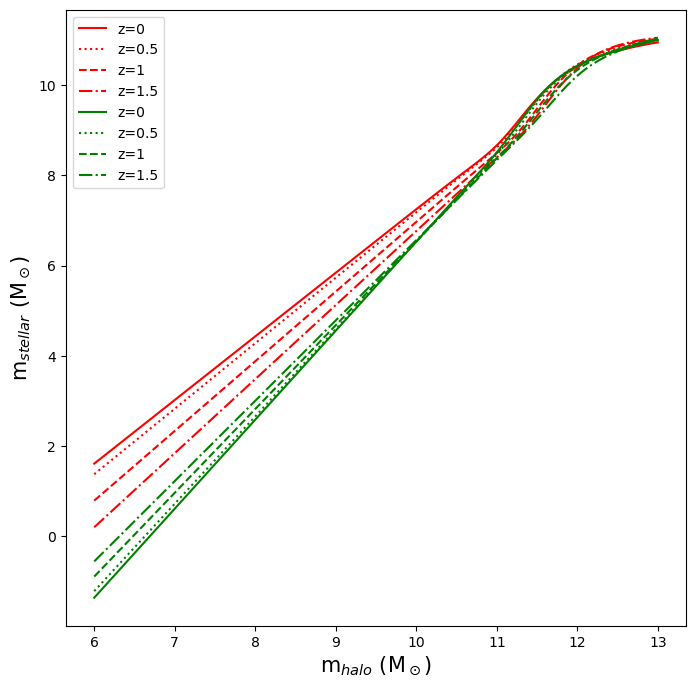

In [17]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

In [18]:
def new_relation(lgMv, alpha, anchor_point):

    intercept = anchor_point[1] - alpha*anchor_point[0]

    return (lgMv*alpha) + intercept

    # quadratic = gamma**2

    # #scatter = powerlaw + sigma

    # return np.log10(powerlaw+quadratic)



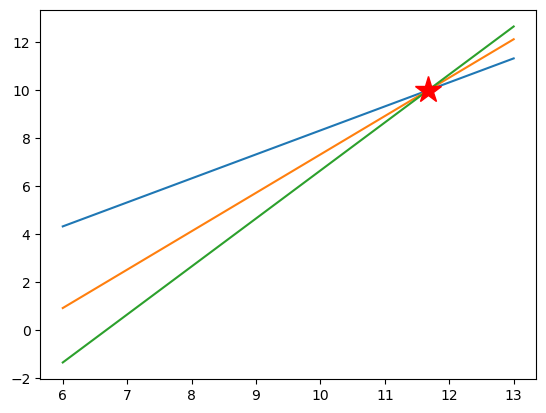

In [19]:
plt.plot(halo_masses, new_relation(halo_masses, 1, anchor_point))
plt.plot(halo_masses, new_relation(halo_masses, 1.6, anchor_point))
plt.plot(halo_masses, new_relation(halo_masses, 2, anchor_point))

plt.plot(anchor_point[0], anchor_point[1], marker="*", color="red", markersize=20)
plt.show()

In [20]:
# from matplotlib.widgets import Slider, Button
# %matplotlib widget


# # The parametrized function to be plotted

# def SHMR_params(lgMv, red, gamma_s, gamma_i):

#     red_dep = 1+np.nanmean(red)
#     a = 1.82*red_dep**gamma_s
#     log_e = -1.5*red_dep**gamma_i
#     lgMs = log_e + 12.5 + a*lgMv - a*12.5

#     return lgMs

# # Define initial parameters
# init_gamma_s = 0
# init_gamma_i = 0

# # Create the figure and the line that we will manipulate

# fig, ax = plt.subplots()
# line, = ax.plot(halo_mass, SHMR_params(halo_mass, red, init_gamma_s, init_gamma_i))
# plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)

# # adjust the main plot to make room for the sliders
# fig.subplots_adjust(left=0.25, bottom=0.25)

# # Make a horizontal slider to control the frequency.
# axslope = fig.add_axes([0.25, 0.1, 0.65, 0.03])
# slope_slider = Slider(
#     ax=axslope,
#     label='slope',
#     valmin=-0.25,
#     valmax=0.25,
#     valinit=init_gamma_s,
# )

# # Make a vertically oriented slider to control the amplitude
# axintercept = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
# intercept_slider = Slider(
#     ax=axintercept,
#     label="intercept",
#     valmin=-0.5,
#     valmax=0.5,
#     valinit=init_gamma_i,
#     orientation="vertical"
# )


# # The function to be called anytime a slider's value changes
# def update(val):
#     line.set_ydata(SHMR_params(halo_mass, red, slope_slider.val, intercept_slider.val))
#     fig.canvas.draw_idle()


# # register the update function with each slider
# slope_slider.on_changed(update)
# intercept_slider.on_changed(update)

# # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')


# def reset(event):
#     slope_slider.reset()
#     intercept_slider.reset()
# button.on_clicked(reset)

# plt.show()

In [21]:
import matplotlib as mpl

In [22]:
d_space = np.linspace(-1,3,20)

In [23]:
norm = mpl.colors.Normalize(vmin=d_space.min(), vmax=d_space.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, d_space.shape[0]))

In [24]:
def new_param(lgMh, a, d):

    M_star_a = 10
    M_halo_a = 11.67

    return a*(lgMh-M_halo_a)  - d*(lgMh-M_halo_a)**2 + M_star_a

In [25]:
halo_masses = np.log10(np.logspace(6,12,100))

stelar_masses = new_param(halo_masses, 2, 1)

In [26]:
test = galhalo.lgMs_D22_det(halo_masses)

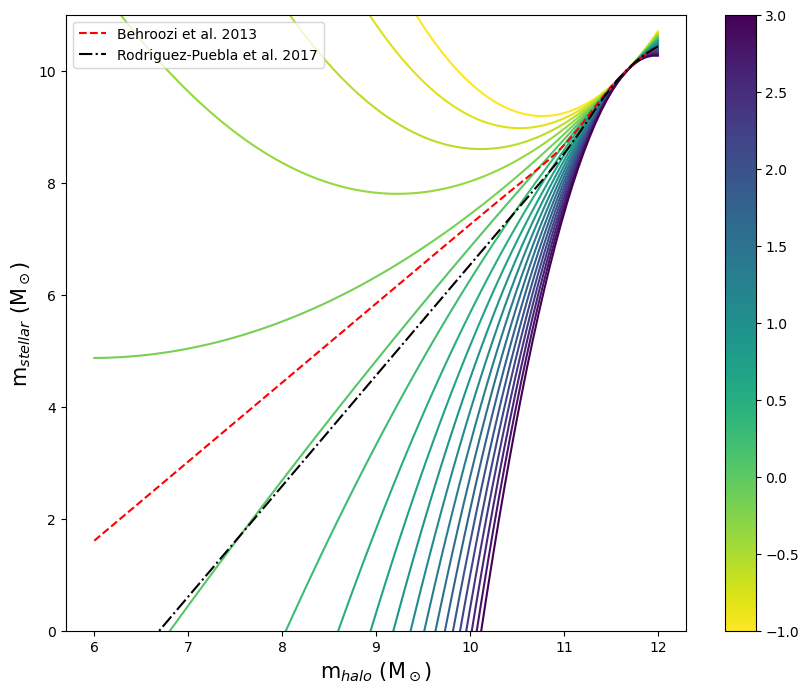

In [27]:
plt.figure(figsize=(10, 8))

for i in range(d_space.shape[0]):
    plt.plot(halo_masses, new_param(halo_masses, a=1.8, d=d_space[i]), color=colors[i])
plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses), color="red", label="Behroozi et al. 2013", ls="--")
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses), color="black", label="Rodriguez-Puebla et al. 2017", ls="-.")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.ylim(0,11)
plt.colorbar(cmap)
plt.show()

In [51]:
halo_masses

array([ 6.        ,  6.06060606,  6.12121212,  6.18181818,  6.24242424,
        6.3030303 ,  6.36363636,  6.42424242,  6.48484848,  6.54545455,
        6.60606061,  6.66666667,  6.72727273,  6.78787879,  6.84848485,
        6.90909091,  6.96969697,  7.03030303,  7.09090909,  7.15151515,
        7.21212121,  7.27272727,  7.33333333,  7.39393939,  7.45454545,
        7.51515152,  7.57575758,  7.63636364,  7.6969697 ,  7.75757576,
        7.81818182,  7.87878788,  7.93939394,  8.        ,  8.06060606,
        8.12121212,  8.18181818,  8.24242424,  8.3030303 ,  8.36363636,
        8.42424242,  8.48484848,  8.54545455,  8.60606061,  8.66666667,
        8.72727273,  8.78787879,  8.84848485,  8.90909091,  8.96969697,
        9.03030303,  9.09090909,  9.15151515,  9.21212121,  9.27272727,
        9.33333333,  9.39393939,  9.45454545,  9.51515152,  9.57575758,
        9.63636364,  9.6969697 ,  9.75757576,  9.81818182,  9.87878788,
        9.93939394, 10.        , 10.06060606, 10.12121212, 10.18

In [28]:
def master_SHMR_1D(lgMh, alpha=1.82, delta=0, sigma=None, N_samples=1000, GK_norm=False, beta_norm=False):

    """_summary_

    a flexible Stellar to Halo Mass Relation that has a few tricks up its sleeve
    Returns:
        numpy array: stellar masses!
    """

    M_star_a = 10 # these are the anchor points
    M_halo_a = 11.67

    if sigma != None:
        print("randomly sampling the lognormal PDF", N_samples, "times")

        if GK_norm == True:
            alpha_norm = 0.14*sigma**2 + 0.14*sigma+ 1.79
            lgMs = alpha_norm*(lgMh-M_halo_a)  - delta*(lgMh-M_halo_a)**2 + M_star_a
            scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
            return lgMs + scatter
        
        if beta_norm == True:
            lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
            scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
            return lgMs + scatter - (sigma**2)/4.605
        
        else:
            print("not normalizing for the upscatter")
            lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
            scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
            return lgMs + scatter

    else:
        print("assuming a deterministic SHMR")
        lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
        return lgMs

In [52]:
MS = master_SHMR_1D(halo_masses, sigma=0.3)
data_ave = np.average(MS,axis=0)
data_std = np.std(MS,axis=0)

randomly sampling the lognormal PDF 1000 times
not normalizing for the upscatter


In [53]:
MS.shape

(1000, 100)

randomly sampling the lognormal PDF 1000 times
not normalizing for the upscatter


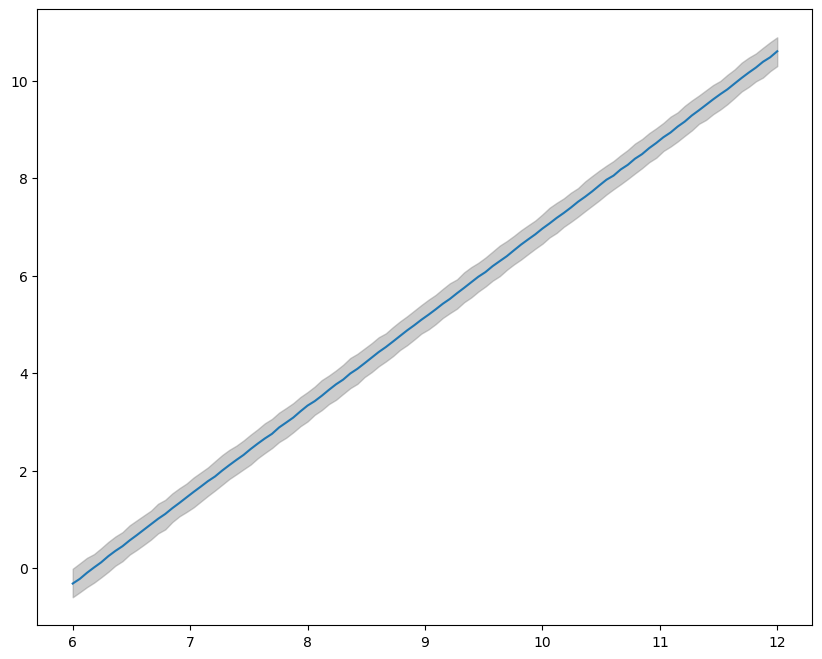

In [54]:
plt.figure(figsize=(10, 8))

plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.2),axis=0))

plt.fill_between(halo_masses, y1=data_ave + data_std, y2=data_ave - data_std, alpha=0.4, color="grey")


randomly sampling the lognormal PDF 1000 times
not normalizing for the upscatter
randomly sampling the lognormal PDF 1000 times
not normalizing for the upscatter
randomly sampling the lognormal PDF 1000 times
not normalizing for the upscatter


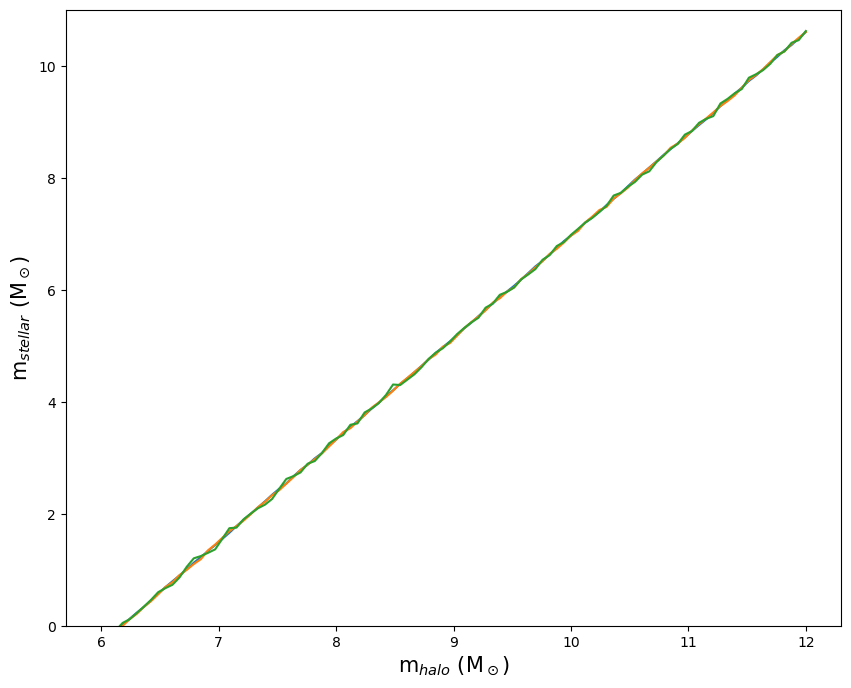

In [43]:
plt.figure(figsize=(10, 8))

plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.2),axis=0))
plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.5),axis=0))
plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=1),axis=0))

# plt.plot(halo_masses, master_SHMR_1D(halo_masses, sigma=0.5))
# plt.plot(halo_masses, master_SHMR_1D(halo_masses, sigma=1))
# plt.plot(halo_masses, master_SHMR_1D(halo_masses), color="black")
plt.ylim(0,11)
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.show()

randomly sampling the lognormal PDF 1000 times
randomly sampling the lognormal PDF 1000 times
randomly sampling the lognormal PDF 1000 times
assuming a deterministic SHMR


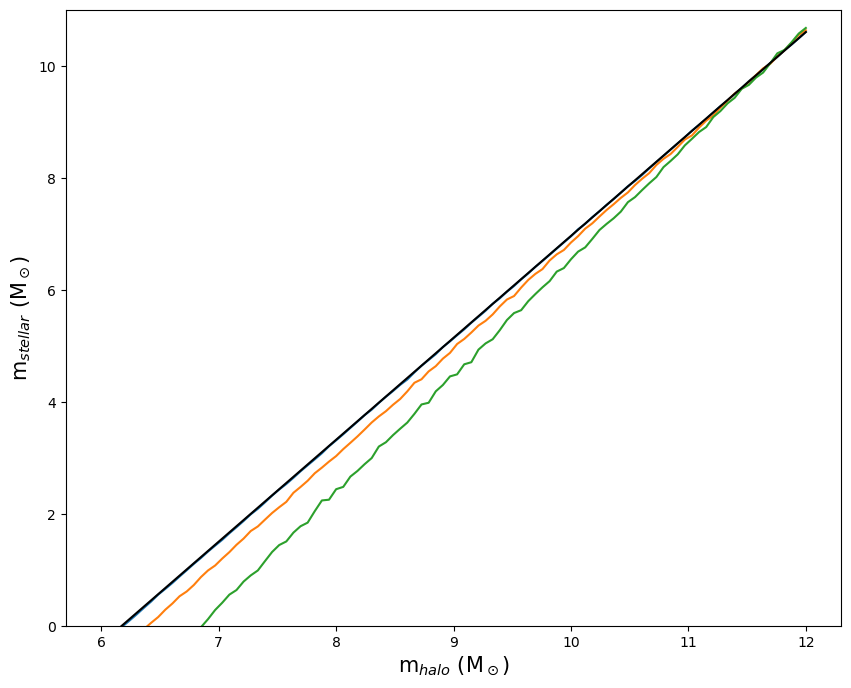

In [30]:
plt.figure(figsize=(10, 8))

plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.2, GK_norm=True), axis=0))
plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.5, GK_norm=True), axis=0))
plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=1, GK_norm=True), axis=0))
plt.plot(halo_masses, master_SHMR_1D(halo_masses), color="black")
plt.ylim(0,11)
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.show()

randomly sampling the lognormal PDF 1000 times
randomly sampling the lognormal PDF 1000 times
randomly sampling the lognormal PDF 1000 times
assuming a deterministic SHMR


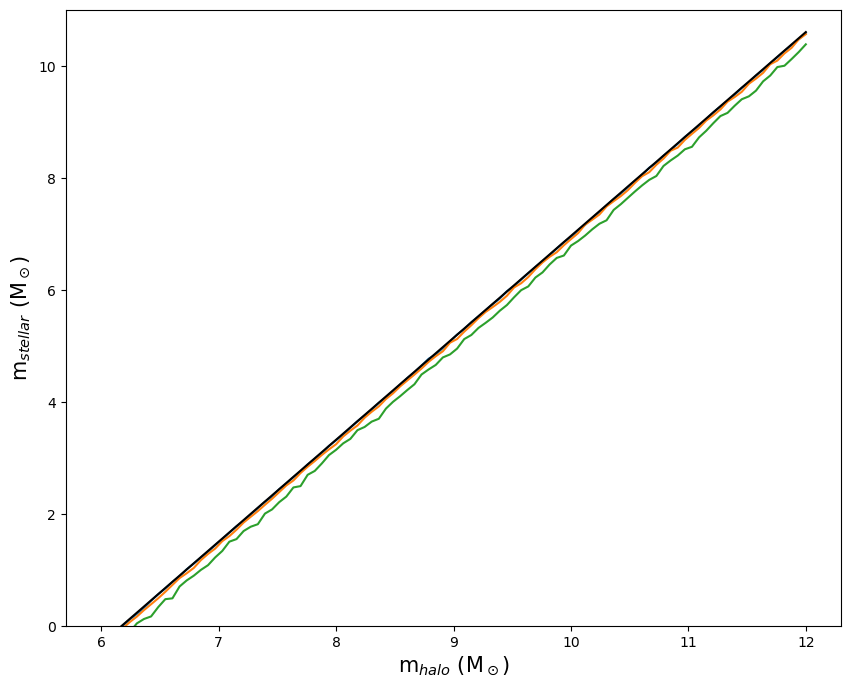

In [31]:
plt.figure(figsize=(10, 8))

plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.2, beta_norm=True), axis=0))
plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=0.5, beta_norm=True), axis=0))
plt.plot(halo_masses, np.average(master_SHMR_1D(halo_masses, sigma=1, beta_norm=True), axis=0))
plt.plot(halo_masses, master_SHMR_1D(halo_masses), color="black")
plt.ylim(0,11)
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.show()

assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR


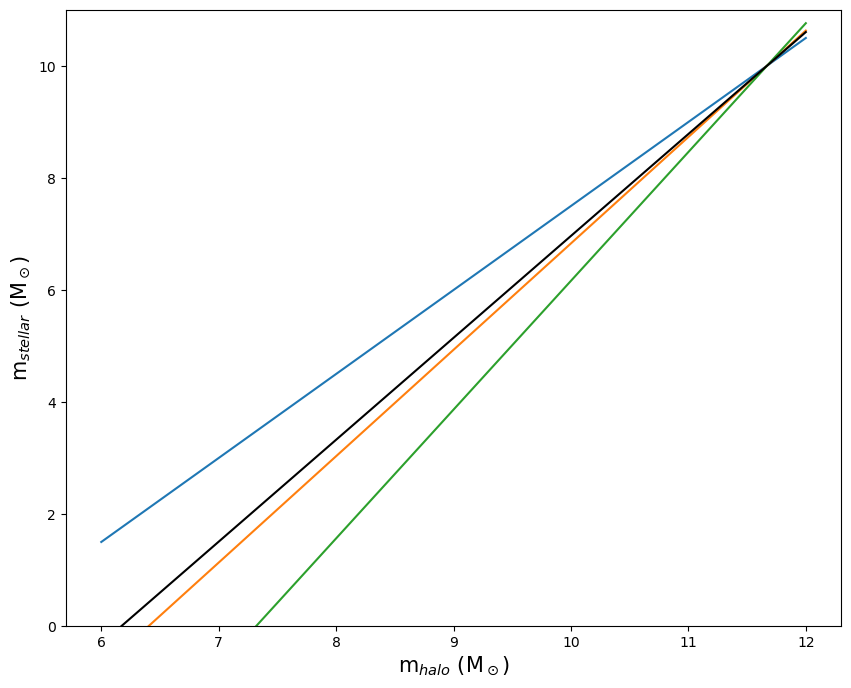

In [32]:
plt.figure(figsize=(10, 8))

plt.plot(halo_masses, master_SHMR_1D(halo_masses, alpha=1.5))
plt.plot(halo_masses, master_SHMR_1D(halo_masses, alpha=1.9))
plt.plot(halo_masses, master_SHMR_1D(halo_masses, alpha=2.3))
plt.plot(halo_masses, master_SHMR_1D(halo_masses), color="black")
plt.ylim(0,11)
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.show()

assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR


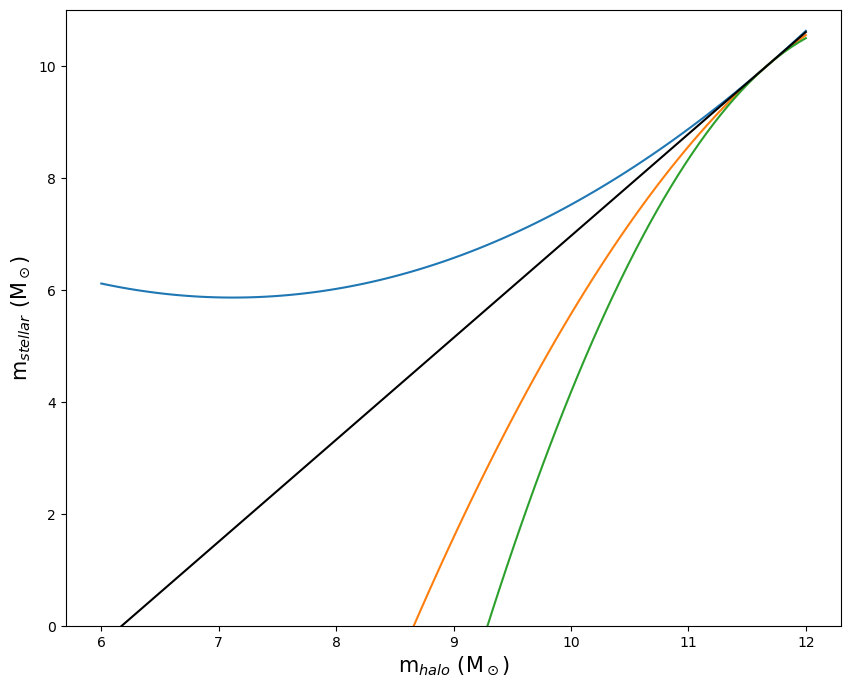

In [33]:
plt.figure(figsize=(10, 8))

plt.plot(halo_masses, master_SHMR_1D(halo_masses, delta=-0.2))
plt.plot(halo_masses, master_SHMR_1D(halo_masses, delta=0.5))
plt.plot(halo_masses, master_SHMR_1D(halo_masses, delta=1))
plt.plot(halo_masses, master_SHMR_1D(halo_masses), color="black")
plt.ylim(0,11)
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.show()

assuming a deterministic SHMR
randomly sampling the lognormal PDF 1000 times
not normalizing for the upscatter


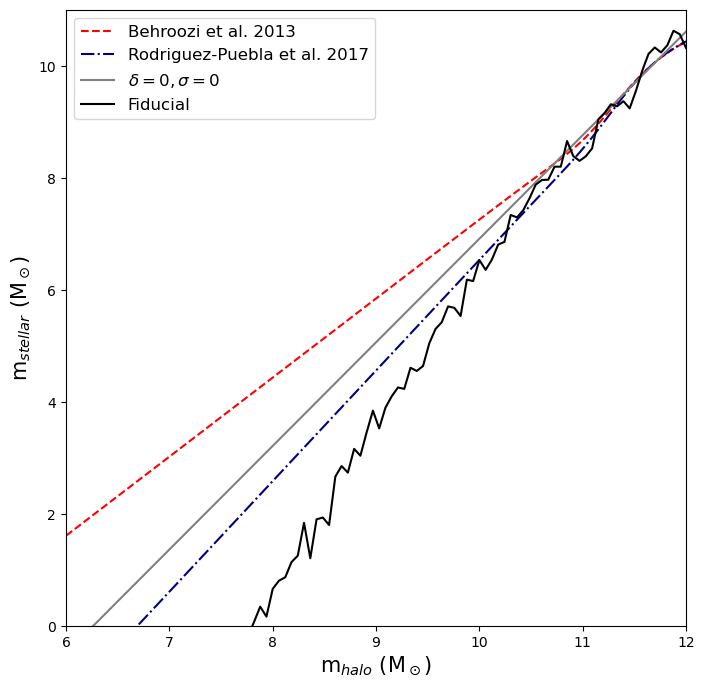

In [34]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses), color="red", label="Behroozi et al. 2013", ls="--")
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses), color="navy", label="Rodriguez-Puebla et al. 2017", ls="-.")
plt.plot(halo_masses, master_SHMR_1D(halo_masses, alpha=1.85), color="grey", label="$\\delta=0, \sigma=0$")
plt.plot(halo_masses, master_SHMR_1D(halo_masses, alpha=1.85, delta=0.2, sigma=0.2)[0], color="black", label="Fiducial")

# plt.axhline(9.43, label="LMC")
# plt.axhline(8.64, label="SMC")


plt.ylim(0,11)
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend(fontsize=12)
plt.xlim(6,12)
plt.show()

In [35]:
lgMh = np.load("../../data/3000_12_8/truth_lgMh.npy")

In [36]:
alpha, delta, sigma = 1.85, 0.2, 0.2

M_star_a = 10 # these are the anchor points
M_halo_a = 11.67

In [37]:
lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a

In [38]:
lgMs

array([[1.15838272, 1.13525715, 1.0873761 , ...,        nan,        nan,
               nan],
       [5.50577895, 2.53290891, 2.03667144, ...,        nan,        nan,
               nan],
       [1.50972637, 3.11831373, 3.88866882, ...,        nan,        nan,
               nan],
       ...,
       [1.92990625, 6.78157197, 2.82064897, ...,        nan,        nan,
               nan],
       [1.42934174, 1.69889907, 6.60750338, ...,        nan,        nan,
               nan],
       [1.68451707, 6.6281257 , 3.33828585, ...,        nan,        nan,
               nan]])

In [39]:

scatter = np.random.normal(loc=0, scale=sigma, size=(lgMs.shape))


In [40]:
scatter

array([[ 0.10161084, -0.05377294, -0.13658368, ...,  0.19972431,
        -0.41260738, -0.22207601],
       [-0.30385001, -0.02590657, -0.01893376, ...,  0.29878695,
         0.3012569 , -0.40094709],
       [ 0.10742775, -0.01670079,  0.43843841, ...,  0.02624048,
         0.16746096, -0.2407641 ],
       ...,
       [-0.2474512 ,  0.03131907, -0.33680179, ..., -0.06906642,
        -0.28370853,  0.36338841],
       [-0.02932287,  0.10370269, -0.20544584, ...,  0.04323327,
        -0.15698157, -0.21529927],
       [-0.0568566 ,  0.0285374 , -0.15048937, ..., -0.25686796,
        -0.11388767,  0.20453312]])

In [41]:
lgMs + scatter

array([[1.25999356, 1.08148421, 0.95079241, ...,        nan,        nan,
               nan],
       [5.20192894, 2.50700234, 2.01773768, ...,        nan,        nan,
               nan],
       [1.61715412, 3.10161294, 4.32710722, ...,        nan,        nan,
               nan],
       ...,
       [1.68245504, 6.81289104, 2.48384718, ...,        nan,        nan,
               nan],
       [1.40001886, 1.80260176, 6.40205754, ...,        nan,        nan,
               nan],
       [1.62766046, 6.65666311, 3.18779649, ...,        nan,        nan,
               nan]])